In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

In [2]:
df_int = pd.read_csv(r"E:\Interference Analysis Project\Cambium Data/CPE_interference_combined_21_30Jan.csv")

In [3]:
df_int.shape

(436578, 62)

In [4]:
df_int.columns

Index(['id', 'Device_MAC', 'Device_IP', 'Device_Name', 'Device_Type',
       'Software_Version', 'Hardware_Revision', 'System_Uptime',
       'System_Uptime_Since', 'RF_Session_Time', 'RF_Session_Time_Since',
       'Registered_To', 'AP_IP_Address', 'Country', 'Ethernet_Status',
       'Total_Packet_Errors', 'Total_Packet_Drops', 'Link_Quality_Perc',
       'Link_Capacity_Perc', 'Link_Distance_Km', 'Operating_Frequency_MHz',
       'Channel_Bandwidth_MHz', 'Device_Reboot_Count', 'Soft_Reboot_Count',
       'Hard_Reboot_Count', 'Session_Drop_Count', 'LAN_Tx_Rate_Bytes_Per_Sec',
       'LAN_Rx_Rate_Bytes_Per_Sec', 'DL_RSSI_dBm', 'UL_RSSI_dBm', 'DL_MCS',
       'UL_MCS', 'Transmit_Power_dBm', 'Interference', 'Aging',
       'IssueCategory', 'Circle', 'Vendor', 'Date', 'Hour',
       'lastoccurenceDateTimeInterference', 'LSI_count', 'lsi_1', 'lsi_2',
       'lsi_3', 'lsi_4', 'lsi_5', 'lsi_6', 'lsi_7', 'lsi_8', 'lsi_9', 'lsi_10',
       'lsi_11', 'lsi_12', 'lsi_13', 'lsi_14', 'lsi_15', 'lsi

In [80]:
df_inv = pd.read_csv(r"E:\Interference Analysis Project\Cambium Data/inventory_combined_21_30jan.csv")

In [81]:
df_inv.shape

(766617, 34)

In [82]:
df_inv.columns

Index(['id', 'Hour', 'Device_IP', 'Device_MAC_Address', 'Device_Name',
       'Device_Type', 'Software_Version', 'Hardware_Revision', 'Latitude',
       'Longitude', 'Circle', 'Vendor', 'ATPC', 'TDD_Split_Ratio', 'ACS',
       'Link_Type', 'Duplex_Setting', 'Utilization_UL', 'DFS_Mode', 'MTU',
       'Qos', 'Throughput_UL', 'Throughput_DL', 'Uplink_Retransmission_Pkts',
       'Downlink_Retransmission_Pkts', 'Rx_PPS', 'Tx_PPS', 'VOIP', 'SNR',
       'dlWLanTotalPacketCount', 'ulWLanTotalPacketCount',
       'dlWlanretransmittedpackets', 'ulWlanretransmittedpackets', 'Date'],
      dtype='object')

In [6]:
# df_inv[df_inv.Device_IP == '10.10.160.210']

In [9]:
df_inv = df_inv[['Date', 'Hour', 'Device_IP','dlWlanretransmittedpackets', 'ulWlanretransmittedpackets']]

In [10]:
# df_cpe_kpi = pd.read_csv(r"E:\Interference Analysis Project\15 min data 2/Ankur Srivastava_1706506941857_cambium_sm_23378.csv")

In [11]:
# x = df_cpe_kpi[df_cpe_kpi.AP_IP_Address == '10.10.160.210']
# x[x.Device_IP == '10.10.160.217']

In [12]:
df_inf_inv = pd.merge(df_int,df_inv, on = ['Date', 'Hour','Device_IP'], how = 'left')

In [13]:
df_inf_inv.head(2)

,id,Device_MAC,Device_IP,Device_Name,Device_Type,Software_Version,Hardware_Revision,System_Uptime,System_Uptime_Since,RF_Session_Time,RF_Session_Time_Since,Registered_To,AP_IP_Address,Country,Ethernet_Status,Total_Packet_Errors,Total_Packet_Drops,Link_Quality_Perc,Link_Capacity_Perc,Link_Distance_Km,Operating_Frequency_MHz,Channel_Bandwidth_MHz,Device_Reboot_Count,Soft_Reboot_Count,Hard_Reboot_Count,Session_Drop_Count,LAN_Tx_Rate_Bytes_Per_Sec,LAN_Rx_Rate_Bytes_Per_Sec,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,Interference,Aging,IssueCategory,Circle,Vendor,Date,Hour,lastoccurenceDateTimeInterference,LSI_count,lsi_1,lsi_2,lsi_3,lsi_4,lsi_5,lsi_6,lsi_7,lsi_8,lsi_9,lsi_10,lsi_11,lsi_12,lsi_13,lsi_14,lsi_15,lsi_16,lsi_17,lsi_18,lsi_19,lsi_20,dlWlanretransmittedpackets,ulWlanretransmittedpackets
0,937638753.0,58:C1:7A:B8:E0:DB,10.15.115.204,UNIAN BANK-4467460,SM,4.7-RC36,5 GHz Force 200L Radio V2,"11 days,6 hours,55 minutes,39.36 seconds",2024-01-27 00:00:00,0011:06:53:10,2024-01-26 12:53:07,BC:E6:7C:63:BE:E1,10.15.115.203,India,100 Mb/sFull,0.0,0.0,100.0,100.0,0.48,5215.0,20 MHZ,NaN,NaN,NaN,NaN,NaN,NaN,-57.0,-40.0,15.0,15.0,21.0,N,0.0,NaN,DL NCR,cambium,2024-01-27,0.0,NaN,1.0,14403667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.562828
1,937638802.0,58:C1:7A:BE:C7:17,10.15.115.199,Central Bank_ Barwana,SM,4.6.2,5 GHz Force 190 Radio (ROW/ETSI),"92 days,12 hours,26 minutes,25.28 seconds",2024-01-27 00:00:00,0013:08:45:52,2024-01-26 10:51:15,58:C1:7A:71:A4:40,10.15.115.194,Other,100 Mb/sFull,0.0,0.0,100.0,30.0,0.03,5630.0,20 MHZ,NaN,NaN,NaN,NaN,NaN,NaN,-50.0,-55.0,12.0,12.0,27.0,N,0.0,NaN,DL NCR,cambium,2024-01-27,0.0,NaN,1.0,14026361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.161824


In [14]:
df_inf_inv.columns

Index(['id', 'Device_MAC', 'Device_IP', 'Device_Name', 'Device_Type',
       'Software_Version', 'Hardware_Revision', 'System_Uptime',
       'System_Uptime_Since', 'RF_Session_Time', 'RF_Session_Time_Since',
       'Registered_To', 'AP_IP_Address', 'Country', 'Ethernet_Status',
       'Total_Packet_Errors', 'Total_Packet_Drops', 'Link_Quality_Perc',
       'Link_Capacity_Perc', 'Link_Distance_Km', 'Operating_Frequency_MHz',
       'Channel_Bandwidth_MHz', 'Device_Reboot_Count', 'Soft_Reboot_Count',
       'Hard_Reboot_Count', 'Session_Drop_Count', 'LAN_Tx_Rate_Bytes_Per_Sec',
       'LAN_Rx_Rate_Bytes_Per_Sec', 'DL_RSSI_dBm', 'UL_RSSI_dBm', 'DL_MCS',
       'UL_MCS', 'Transmit_Power_dBm', 'Interference', 'Aging',
       'IssueCategory', 'Circle', 'Vendor', 'Date', 'Hour',
       'lastoccurenceDateTimeInterference', 'LSI_count', 'lsi_1', 'lsi_2',
       'lsi_3', 'lsi_4', 'lsi_5', 'lsi_6', 'lsi_7', 'lsi_8', 'lsi_9', 'lsi_10',
       'lsi_11', 'lsi_12', 'lsi_13', 'lsi_14', 'lsi_15', 'lsi

In [15]:
df = df_inf_inv.copy()

In [16]:
df.columns

Index(['id', 'Device_MAC', 'Device_IP', 'Device_Name', 'Device_Type',
       'Software_Version', 'Hardware_Revision', 'System_Uptime',
       'System_Uptime_Since', 'RF_Session_Time', 'RF_Session_Time_Since',
       'Registered_To', 'AP_IP_Address', 'Country', 'Ethernet_Status',
       'Total_Packet_Errors', 'Total_Packet_Drops', 'Link_Quality_Perc',
       'Link_Capacity_Perc', 'Link_Distance_Km', 'Operating_Frequency_MHz',
       'Channel_Bandwidth_MHz', 'Device_Reboot_Count', 'Soft_Reboot_Count',
       'Hard_Reboot_Count', 'Session_Drop_Count', 'LAN_Tx_Rate_Bytes_Per_Sec',
       'LAN_Rx_Rate_Bytes_Per_Sec', 'DL_RSSI_dBm', 'UL_RSSI_dBm', 'DL_MCS',
       'UL_MCS', 'Transmit_Power_dBm', 'Interference', 'Aging',
       'IssueCategory', 'Circle', 'Vendor', 'Date', 'Hour',
       'lastoccurenceDateTimeInterference', 'LSI_count', 'lsi_1', 'lsi_2',
       'lsi_3', 'lsi_4', 'lsi_5', 'lsi_6', 'lsi_7', 'lsi_8', 'lsi_9', 'lsi_10',
       'lsi_11', 'lsi_12', 'lsi_13', 'lsi_14', 'lsi_15', 'lsi

In [18]:
df = df[[ 'Date', 'Hour', 'Device_IP', 'RF_Session_Time', 'Ethernet_Status','Total_Packet_Errors', 'Total_Packet_Drops', 'Link_Quality_Perc', 'Link_Capacity_Perc','Operating_Frequency_MHz','LAN_Tx_Rate_Bytes_Per_Sec',
       'LAN_Rx_Rate_Bytes_Per_Sec', 'DL_RSSI_dBm', 'UL_RSSI_dBm', 'DL_MCS',
       'UL_MCS', 'Transmit_Power_dBm', 'Interference',
       'Link_Distance_Km',  'dlWlanretransmittedpackets', 'ulWlanretransmittedpackets' ]]

In [19]:
df.head()

,Date,Hour,Device_IP,RF_Session_Time,Ethernet_Status,Total_Packet_Errors,Total_Packet_Drops,Link_Quality_Perc,Link_Capacity_Perc,Operating_Frequency_MHz,LAN_Tx_Rate_Bytes_Per_Sec,LAN_Rx_Rate_Bytes_Per_Sec,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,Interference,Link_Distance_Km,dlWlanretransmittedpackets,ulWlanretransmittedpackets
0,2024-01-27,0.0,10.15.115.204,0011:06:53:10,100 Mb/sFull,0.0,0.0,100.0,100.0,5215.0,NaN,NaN,-57.0,-40.0,15.0,15.0,21.0,N,0.48,0.0,0.562828
1,2024-01-27,0.0,10.15.115.199,0013:08:45:52,100 Mb/sFull,0.0,0.0,100.0,30.0,5630.0,NaN,NaN,-50.0,-55.0,12.0,12.0,27.0,N,0.03,0.0,12.161824
2,2024-01-27,0.0,10.2.246.237,0002:07:11:33,100 Mb/sFull,0.0,0.0,91.0,80.0,5680.0,4252652.0,2185089.0,-52.0,-47.0,7.0,12.0,25.0,N,1.26,0.0,10.779966
3,2024-01-27,0.0,10.2.243.231,0077:11:33:43,100 Mb/sFull,0.0,0.0,100.0,100.0,5865.0,21172.0,18095.0,-59.0,-46.0,11.0,15.0,20.0,N,0.78,0.0,0.139504
4,2024-01-27,0.0,10.2.243.140,0035:08:23:54,NaN,0.0,0.0,100.0,100.0,5200.0,NaN,NaN,-35.0,-44.0,15.0,15.0,21.0,N,NaN,0.0,0.662656


In [20]:
df.shape

(436578, 21)

In [21]:
df.to_csv(r"E:\Interference Analysis Project\Cambium Data/Cambium_data_21_30_Jan.csv", index = False)

In [38]:
df = pd.read_csv(r"E:\Interference Analysis Project\Cambium Data/Cambium_data_21_30_Jan_Hourly.csv")

In [39]:
df.head(2)

,Date,Hour,Device_IP,RF_Session_Time,Ethernet_Status,Total_Packet_Errors,Total_Packet_Drops,Link_Quality_Perc,Link_Capacity_Perc,Operating_Frequency_MHz,LAN_Tx_Rate_Bytes_Per_Sec,LAN_Rx_Rate_Bytes_Per_Sec,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,Interference,Link_Distance_Km,dlWlanretransmittedpackets,ulWlanretransmittedpackets
0,2024-01-27,0.0,10.15.115.204,0011:06:53:10,100 Mb/sFull,0.0,0.0,100.0,100.0,5215.0,NaN,NaN,-57.0,-40.0,15.0,15.0,21.0,N,0.48,0.0,0.562828
1,2024-01-27,0.0,10.15.115.199,0013:08:45:52,100 Mb/sFull,0.0,0.0,100.0,30.0,5630.0,NaN,NaN,-50.0,-55.0,12.0,12.0,27.0,N,0.03,0.0,12.161824


In [41]:
df.Date.unique()

array(['2024-01-27', '2024-01-26', '2024-01-25', '2024-01-21',
       '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-28',
       '2024-01-29', '2024-01-30'], dtype=object)

In [61]:
desired_dates = ['2024-01-22', '2024-01-23', '2024-01-24', '2024-01-28', '2024-01-29', '2024-01-30']
df_new = df[df['Date'].isin(desired_dates)]

In [62]:
df_new.Date.unique()

array(['2024-01-22T00:00:00.000000000', '2024-01-23T00:00:00.000000000',
       '2024-01-24T00:00:00.000000000', '2024-01-28T00:00:00.000000000',
       '2024-01-29T00:00:00.000000000', '2024-01-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [63]:
z.Date.unique()

array(['2024-01-22T00:00:00.000000000', '2024-01-23T00:00:00.000000000',
       '2024-01-24T00:00:00.000000000', '2024-01-28T00:00:00.000000000',
       '2024-01-29T00:00:00.000000000', '2024-01-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [64]:
z = df_new[df.Device_IP == '10.29.7.99']
z.head()

,Date,Hour,Device_IP,RF_Session_Time,Ethernet_Status,Total_Packet_Errors,Total_Packet_Drops,Link_Quality_Perc,Link_Capacity_Perc,Operating_Frequency_MHz,LAN_Tx_Rate_Bytes_Per_Sec,LAN_Rx_Rate_Bytes_Per_Sec,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,Interference,Link_Distance_Km,dlWlanretransmittedpackets,ulWlanretransmittedpackets
153638,2024-01-22,0.0,10.29.7.99,0035:14:46:49,100 Mb/sFull,0.0,0.0,98.0,85.000000,5685.0,361159.0,439547.0,-47.0,-46.0,7.0,14.0,30.0,N,0.18,0.0,7.842064
155575,2024-01-22,1.0,10.29.7.99,0035:15:46:37,100 Mb/sFull,0.0,0.0,100.0,76.666667,5685.0,526594.0,658113.0,-47.0,-46.0,9.0,13.0,30.0,N,0.18,0.0,7.841974
157507,2024-01-22,2.0,10.29.7.99,0035:17:02:20,100 Mb/sFull,0.0,0.0,100.0,85.000000,5685.0,390585.0,464341.0,-46.0,-46.0,6.0,14.0,30.0,N,0.18,0.0,7.841746
159437,2024-01-22,3.0,10.29.7.99,0035:18:00:14,100 Mb/sFull,0.0,0.0,94.0,80.000000,5685.0,505122.0,605566.0,-46.0,-46.0,7.0,14.0,30.0,N,0.18,0.0,7.841648
161365,2024-01-22,4.0,10.29.7.99,0035:18:46:27,100 Mb/sFull,0.0,0.0,96.5,82.500000,5685.0,765705.0,974018.0,-47.0,-45.0,7.0,14.0,30.0,N,0.18,0.0,7.841440


In [65]:
z['Date'] = pd.to_datetime(z['Date'])

<Axes: xlabel='Date', ylabel='Link_Capacity_Perc'>

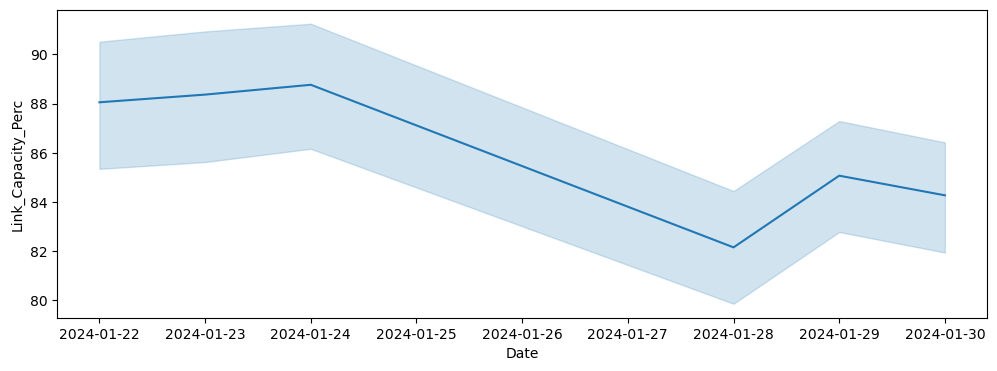

In [66]:
plt.figure(figsize = (12,4))
sns.lineplot(y = z['Link_Capacity_Perc'], x = z['Date'], data = z)

In [69]:
mcs_mapping = pd.read_csv(r"E:\Interference Analysis Project/cam_rad_mcs_mapping.csv")

In [70]:
z = pd.merge(z,mcs_mapping, on = 'DL_MCS', how = 'left')

<Axes: xlabel='Date', ylabel='DL_MCS_Mapped'>

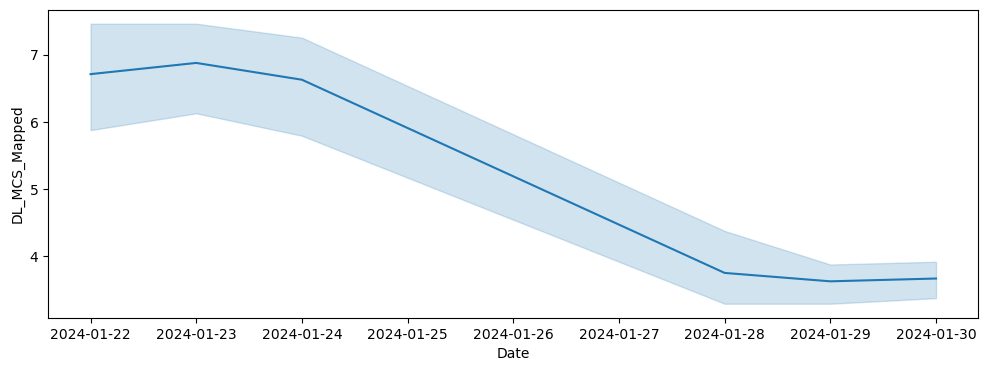

In [72]:
plt.figure(figsize = (12,4))
sns.lineplot(y = z['DL_MCS_Mapped'], x = z['Date'], data = z)

In [77]:
df_new = pd.merge(df_new, mcs_mapping, on ='DL_MCS', how = 'left')

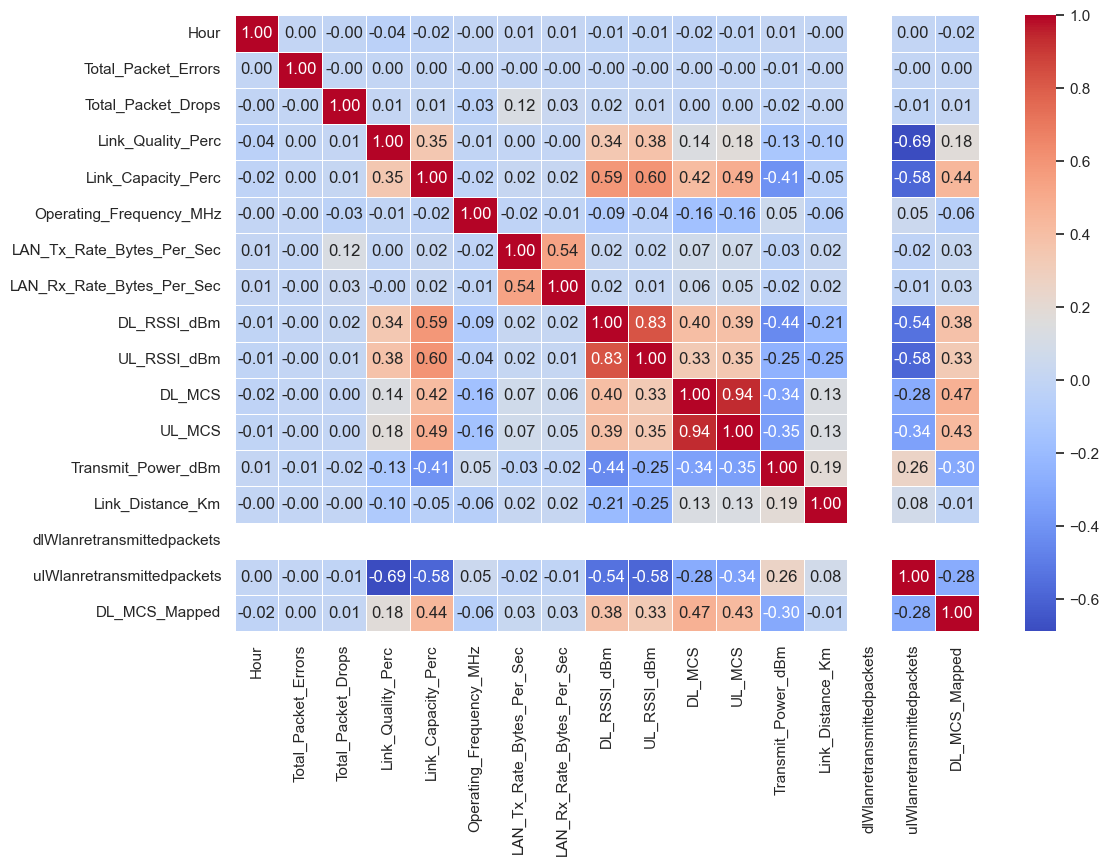

In [78]:
sns.set(style="white")
plt.figure(figsize=(12, 8)) 

sns.heatmap(df_new.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)


plt.show()

In [79]:
df_new.head()

,Date,Hour,Device_IP,RF_Session_Time,Ethernet_Status,Total_Packet_Errors,Total_Packet_Drops,Link_Quality_Perc,Link_Capacity_Perc,Operating_Frequency_MHz,LAN_Tx_Rate_Bytes_Per_Sec,LAN_Rx_Rate_Bytes_Per_Sec,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,Interference,Link_Distance_Km,dlWlanretransmittedpackets,ulWlanretransmittedpackets,Vendor,DL_MCS_Mapped
0,2024-01-22,0.0,10.10.11.234,0031:01:01:22,100 Mb/sFull,0.0,0.0,93.666667,73.333333,5840.0,4488452.0,4646937.0,-58.0,-52.0,14.0,12.0,27.0,N,1.71,NaN,NaN,CAMBIUM,6.0
1,2024-01-22,0.0,10.10.118.118,0030:12:54:40,1000 Mb/sFull,0.0,75200.0,99.500000,100.000000,5690.0,114738251.0,17556384.0,-42.0,-44.0,39.0,39.0,16.0,N,0.75,0.0,0.103280,CAMBIUM,9.0
2,2024-01-22,0.0,10.10.118.150,0010:00:18:28,100 Mb/sFull,0.0,0.0,100.000000,100.000000,5850.0,1112682.0,1479180.0,-48.0,-40.0,15.0,15.0,22.0,N,0.78,0.0,0.379684,CAMBIUM,7.0
3,2024-01-22,0.0,10.10.140.116,0045:04:47:53,100 Mb/sFull,0.0,0.0,100.000000,100.000000,5530.0,691886.0,108020.0,-37.0,-40.0,15.0,15.0,19.0,N,0.33,NaN,NaN,CAMBIUM,7.0
4,2024-01-22,0.0,10.10.140.118,0045:04:47:51,100 Mb/sFull,0.0,0.0,95.666667,40.000000,5530.0,21172136.0,1998557.0,-68.0,-65.0,12.0,7.0,26.0,N,0.63,NaN,NaN,CAMBIUM,4.0


In [83]:
df_snr = df_inv.copy()

In [87]:
df_snr.SNR.isna().sum()

132369

In [119]:
df_new.head(2)

,Date,Hour,Device_IP,RF_Session_Time,Ethernet_Status,Total_Packet_Errors,Total_Packet_Drops,Link_Quality_Perc,Link_Capacity_Perc,Operating_Frequency_MHz,LAN_Tx_Rate_Bytes_Per_Sec,LAN_Rx_Rate_Bytes_Per_Sec,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,Interference,Link_Distance_Km,dlWlanretransmittedpackets,ulWlanretransmittedpackets,Vendor,DL_MCS_Mapped,Timestamp,Freq_Change,Frequency_Change
0,2024-01-22,0 days 00:00:00,10.10.11.234,0031:01:01:22,100 Mb/sFull,0.0,0.0,93.666667,73.333333,5840.0,4488452.0,4646937.0,-58.0,-52.0,14.0,12.0,27.0,N,1.71,NaN,NaN,CAMBIUM,6.0,2024-01-22 00:00:00,True,0
1948,2024-01-22,0 days 01:00:00,10.10.11.234,0031:02:19:21,100 Mb/sFull,0.0,0.0,88.000000,72.500000,5840.0,8444467.0,147727349.0,-58.0,-53.0,14.0,12.0,28.0,N,1.71,NaN,NaN,CAMBIUM,6.0,2024-01-22 01:00:00,True,0


In [100]:
if df_new['Date'].dtype != 'datetime64[ns]':
    # Convert 'Date' to a datetime column
    df_new['Date'] = pd.to_datetime(df_new['Date'])

# Convert 'Hour' to a datetime.timedelta column
df_new['Hour'] = pd.to_timedelta(df_new['Hour'], unit='h')

# Create 'Timestamp' by adding 'Date' and 'Hour'
df_new['Timestamp'] = df_new['Date'] + df_new['Hour']

# Sort the DataFrame by 'Device_IP' and 'Timestamp'

In [116]:

df_new.sort_values(['Device_IP', 'Timestamp'], inplace=True)

df_new["Frequency_Change"] = df_new.groupby("Device_IP")["Operating_Frequency_MHz"].diff()
df_new["Frequency_Change"] = df_new["Frequency_Change"].fillna(0)
df_new["Frequency_Change"] = df_new["Frequency_Change"].apply(lambda x: 1 if x != 0 else 0)

In [120]:
df_new.Frequency_Change.unique()

array([0, 1], dtype=int64)

In [121]:
x = df_new[df_new['Frequency_Change'] == 1]

In [122]:
x.Device_IP.unique(), x.Device_IP.nunique()

(array(['10.10.118.118', '10.15.13.213', '10.180.174.20', '10.180.213.140',
        '10.189.112.221', '10.189.215.88', '10.189.224.88', '10.189.7.36',
        '10.2.104.105', '10.2.105.244', '10.2.156.125', '10.2.165.60',
        '10.2.236.4', '10.2.238.67', '10.2.63.39', '10.2.63.44',
        '10.2.65.250', '10.2.65.252', '10.2.71.180', '10.21.136.36',
        '10.21.136.43', '10.21.136.99', '10.22.206.28', '10.22.76.118',
        '10.24.165.155', '10.24.72.106', '10.27.107.77', '10.27.118.134',
        '10.27.118.85', '10.27.13.119', '10.27.149.77', '10.27.153.213',
        '10.27.223.228', '10.27.226.116', '10.27.228.168', '10.27.229.142',
        '10.27.75.195', '10.27.81.115', '10.28.100.115', '10.28.111.195',
        '10.28.112.24', '10.28.127.136', '10.28.136.197', '10.28.136.200',
        '10.28.19.56', '10.28.216.213', '10.28.224.35', '10.28.62.35',
        '10.28.72.51', '10.28.72.53', '10.29.40.71', '10.29.52.244',
        '10.29.61.19', '10.29.61.21', '10.29.7.99', '10.3.10

In [124]:
df_new.drop('Freq_Change', axis =1, inplace =True)

In [126]:
p = df_new[df_new.Device_IP == '10.10.118.118']

In [127]:
ip_list = ['10.10.118.118', '10.15.13.213', '10.180.174.20', '10.180.213.140',
        '10.189.112.221', '10.189.215.88', '10.189.224.88', '10.189.7.36',
        '10.2.104.105', '10.2.105.244', '10.2.156.125', '10.2.165.60',
        '10.2.236.4', '10.2.238.67', '10.2.63.39', '10.2.63.44',
        '10.2.65.250', '10.2.65.252', '10.2.71.180', '10.21.136.36',
        '10.21.136.43', '10.21.136.99', '10.22.206.28', '10.22.76.118',
        '10.24.165.155', '10.24.72.106', '10.27.107.77', '10.27.118.134',
        '10.27.118.85', '10.27.13.119', '10.27.149.77', '10.27.153.213',
        '10.27.223.228', '10.27.226.116', '10.27.228.168', '10.27.229.142',
        '10.27.75.195', '10.27.81.115', '10.28.100.115', '10.28.111.195',
        '10.28.112.24', '10.28.127.136', '10.28.136.197', '10.28.136.200',
        '10.28.19.56', '10.28.216.213', '10.28.224.35', '10.28.62.35',
        '10.28.72.51', '10.28.72.53', '10.29.40.71', '10.29.52.244',
        '10.29.61.19', '10.29.61.21', '10.29.7.99', '10.3.101.216',
        '10.3.103.203', '10.3.123.236', '10.3.143.58', '10.3.172.44',
        '10.3.22.117', '10.3.22.67', '10.3.221.181', '10.3.221.182',
        '10.3.242.35', '10.3.33.201', '10.3.72.57', '10.3.86.30',
        '10.30.196.211', '10.30.233.43', '10.30.233.44', '10.30.233.45',
        '10.30.233.47', '10.30.233.48', '10.30.233.49', '10.30.233.50',
        '10.30.233.51', '10.30.233.52', '10.30.61.83', '10.4.117.194',
        '10.4.117.201', '10.4.131.148', '10.4.149.236', '10.4.16.181',
        '10.4.177.105', '10.4.177.109', '10.4.186.198', '10.4.45.172',
        '10.4.46.234', '10.4.85.186', '10.5.103.106', '10.5.115.61',
        '10.5.137.231', '10.5.137.232', '10.5.137.233', '10.5.137.234',
        '10.5.137.235', '10.5.137.236', '10.5.137.237', '10.5.137.238',
        '10.5.137.239', '10.5.137.240', '10.5.137.241', '10.5.137.242',
        '10.5.137.243', '10.5.137.244', '10.5.137.245', '10.5.137.248',
        '10.5.4.30', '10.6.111.203', '10.6.135.81', '10.6.181.182',
        '10.6.181.184', '10.6.22.11', '10.6.44.151', '10.6.54.163',
        '10.6.70.124', '10.6.79.201', '10.7.105.247', '10.7.105.250',
        '10.7.59.158', '10.71.135.104', '10.71.208.38', '10.71.208.75',
        '10.71.212.184', '10.71.212.187', '10.71.223.109', '10.71.50.41',
        '10.71.61.236', '10.71.86.151', '10.8.111.68', '10.8.244.115',
        '10.8.54.186', '10.8.54.198', '10.8.54.201', '10.9.159.7',
        '10.9.205.102', '10.9.52.218', '172.17.103.75', '172.17.169.115',
        '172.17.207.171', '172.17.83.75', '172.19.22.27', '172.24.14.235',
        '172.24.22.91', '172.25.22.27']

filter_data = df_new[df_new['Device_IP'].isin(ip_list)]

In [128]:
filter_data.to_csv("filter_data.csv", index = False)

In [132]:
df_new = pd.read_csv("filter_data.csv")

In [133]:
df_new.columns

Index(['Date', 'Hour', 'Device_IP', 'RF_Session_Time', 'Ethernet_Status',
       'Total_Packet_Errors', 'Total_Packet_Drops', 'Link_Quality_Perc',
       'Link_Capacity_Perc', 'Operating_Frequency_MHz',
       'LAN_Tx_Rate_Bytes_Per_Sec', 'LAN_Rx_Rate_Bytes_Per_Sec', 'DL_RSSI_dBm',
       'UL_RSSI_dBm', 'DL_MCS', 'UL_MCS', 'Transmit_Power_dBm', 'Interference',
       'Link_Distance_Km', 'dlWlanretransmittedpackets',
       'ulWlanretransmittedpackets', 'Vendor', 'DL_MCS_Mapped', 'Timestamp',
       'Frequency_Change'],
      dtype='object')

In [3]:
df = pd.read_csv(r"E:\Interference Analysis Project\Cambium Data/Cambium_data_21_30_Jan_Hourly.csv")
df.head(2)

,Date,Hour,Device_IP,RF_Session_Time,Ethernet_Status,Total_Packet_Errors,Total_Packet_Drops,Link_Quality_Perc,Link_Capacity_Perc,Operating_Frequency_MHz,LAN_Tx_Rate_Bytes_Per_Sec,LAN_Rx_Rate_Bytes_Per_Sec,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,Interference,Link_Distance_Km,dlWlanretransmittedpackets,ulWlanretransmittedpackets
0,2024-01-27,0.0,10.15.115.204,0011:06:53:10,100 Mb/sFull,0.0,0.0,100.0,100.0,5215.0,NaN,NaN,-57.0,-40.0,15.0,15.0,21.0,N,0.48,0.0,0.562828
1,2024-01-27,0.0,10.15.115.199,0013:08:45:52,100 Mb/sFull,0.0,0.0,100.0,30.0,5630.0,NaN,NaN,-50.0,-55.0,12.0,12.0,27.0,N,0.03,0.0,12.161824


In [5]:
print(df.isna().sum()), print(df.columns)

Date                              0
Hour                              0
Device_IP                         0
RF_Session_Time               13273
Ethernet_Status               46116
Total_Packet_Errors           12396
Total_Packet_Drops            12385
Link_Quality_Perc             12372
Link_Capacity_Perc            12402
Operating_Frequency_MHz       12362
LAN_Tx_Rate_Bytes_Per_Sec     21800
LAN_Rx_Rate_Bytes_Per_Sec     21796
DL_RSSI_dBm                   12399
UL_RSSI_dBm                   11742
DL_MCS                        12358
UL_MCS                        12401
Transmit_Power_dBm            12348
Interference                      0
Link_Distance_Km              13617
dlWlanretransmittedpackets    94357
ulWlanretransmittedpackets    94357
dtype: int64
Index(['Date', 'Hour', 'Device_IP', 'RF_Session_Time', 'Ethernet_Status',
       'Total_Packet_Errors', 'Total_Packet_Drops', 'Link_Quality_Perc',
       'Link_Capacity_Perc', 'Operating_Frequency_MHz',
       'LAN_Tx_Rate_Bytes_Pe

(None, None)

In [6]:
df = df[['Date', 'Hour', 'Device_IP', 'Link_Capacity_Perc', 'Operating_Frequency_MHz', 'DL_RSSI_dBm',
       'UL_RSSI_dBm', 'DL_MCS', 'UL_MCS', 'Transmit_Power_dBm' ]]

# handled missing data

In [14]:
columns_to_backfill = ['DL_RSSI_dBm', 'UL_RSSI_dBm', 'DL_MCS', 'UL_MCS', 'Link_Capacity_Perc']

filled_columns = [f'filled_{col}' for col in columns_to_backfill]

df.sort_values(by=['Device_IP', 'Date', 'Hour'], inplace=True)

df[filled_columns] = df.groupby(['Device_IP'])[columns_to_backfill].apply(lambda group: group.ffill().bfill())

df.reset_index(drop=True, inplace=True)

In [15]:
df.columns

Index(['Date', 'Hour', 'Device_IP', 'Link_Capacity_Perc',
       'Operating_Frequency_MHz', 'DL_RSSI_dBm', 'UL_RSSI_dBm', 'DL_MCS',
       'UL_MCS', 'Transmit_Power_dBm', 'filled_DL_RSSI_dBm',
       'filled_UL_RSSI_dBm', 'filled_DL_MCS', 'filled_UL_MCS',
       'filled_Link_Capacity_Perc'],
      dtype='object')

In [16]:
df.isna().sum()

Date                             0
Hour                             0
Device_IP                        0
Link_Capacity_Perc           12402
Operating_Frequency_MHz      12362
DL_RSSI_dBm                  12399
UL_RSSI_dBm                  11742
DL_MCS                       12358
UL_MCS                       12401
Transmit_Power_dBm           12348
filled_DL_RSSI_dBm            7207
filled_UL_RSSI_dBm               1
filled_DL_MCS                 7207
filled_UL_MCS                 7199
filled_Link_Capacity_Perc     7199
dtype: int64

In [13]:
df.shape

(436578, 15)

# Flags started from here

In [24]:
columns_to_check = ['filled_DL_RSSI_dBm', 'filled_UL_RSSI_dBm']
df['RSSI Delta'] = df[columns_to_check].apply(lambda x: abs(x[0] - x[1]) if pd.notna(x[0]) and pd.notna(x[1]) and x[0] != '' and x[1] != '' else pd.NA, axis=1)
df.head(2)


,Date,Hour,Device_IP,Link_Capacity_Perc,Operating_Frequency_MHz,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,filled_DL_RSSI_dBm,filled_UL_RSSI_dBm,filled_DL_MCS,filled_UL_MCS,filled_Link_Capacity_Perc,RSSI Delta
0,2024-01-21,0.0,10.10.11.234,70.000000,5840.0,-58.0,-53.0,14.0,13.0,28.0,-58.0,-53.0,14.0,13.0,70.000000,5.0
1,2024-01-21,1.0,10.10.11.234,73.333333,5840.0,-58.0,-53.0,15.0,12.0,27.0,-58.0,-53.0,15.0,12.0,73.333333,5.0


In [36]:
# df[df['RSSI Delta']  >= 40]
# df[df.Device_IP == '10.10.176.53']
# df['RSSI Delta'].unique()

In [45]:
mcs_mapping = pd.read_csv(r"E:\Interference Analysis Project/cam_rad_mcs_mapping.csv")
df = pd.merge(df, mcs_mapping, on ='UL_MCS', how = 'left')

In [47]:
df.head(2)
df.drop(['Vendor_x','Vendor_y'], axis = 1, inplace = True)

In [55]:
df.head(2)

,Date,Hour,Device_IP,Link_Capacity_Perc,Operating_Frequency_MHz,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,filled_DL_RSSI_dBm,filled_UL_RSSI_dBm,filled_DL_MCS,filled_UL_MCS,filled_Link_Capacity_Perc,RSSI Delta,Low_UL_MCS_Flag,Low_DL_MCS_Flag,DL_MCS_Mapped,UL_MCS_Mapped
0,2024-01-21,0.0,10.10.11.234,70.000000,5840.0,-58.0,-53.0,14.0,13.0,28.0,-58.0,-53.0,14.0,13.0,70.000000,5.0,1.0,1.0,6.0,5.0
1,2024-01-21,1.0,10.10.11.234,73.333333,5840.0,-58.0,-53.0,15.0,12.0,27.0,-58.0,-53.0,15.0,12.0,73.333333,5.0,1.0,0.0,7.0,4.0


In [54]:
ul_condition = df['UL_MCS_Mapped'] <= 6
dl_condition = df['DL_MCS_Mapped'] <= 6

df['Low_UL_MCS_Flag'] = np.where(df['UL_MCS_Mapped'].isna(), np.nan, ul_condition.astype(int))
df['Low_DL_MCS_Flag'] = np.where(df['DL_MCS_Mapped'].isna(), np.nan, dl_condition.astype(int))




In [56]:
df.Low_UL_MCS_Flag.unique(), df.Low_DL_MCS_Flag.unique()

(array([ 1., nan,  0.]), array([ 1.,  0., nan]))

In [57]:
link_capacity_condition = df['filled_Link_Capacity_Perc'] <= 70

df['Low_Link_Capacity_Flag'] = np.where(df['filled_Link_Capacity_Perc'].isna(), np.nan, link_capacity_condition.astype(int))


In [58]:
df.Low_Link_Capacity_Flag.unique()

array([ 1.,  0., nan])

In [159]:
RSSI_Delta_condition = df['RSSI Delta'] >=5

df['RSSI_Delta_Flag'] = np.where(df['RSSI Delta'].isna(), np.nan, RSSI_Delta_condition.astype(int))

In [160]:
df.RSSI_Delta_Flag.unique()

array([ 1.,  0., nan])

In [161]:
df.head()

,Date,Hour,Device_IP,Link_Capacity_Perc,Operating_Frequency_MHz,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,filled_DL_RSSI_dBm,filled_UL_RSSI_dBm,filled_DL_MCS,filled_UL_MCS,filled_Link_Capacity_Perc,RSSI Delta,Low_UL_MCS_Flag,Low_DL_MCS_Flag,DL_MCS_Mapped,UL_MCS_Mapped,Low_Link_Capacity_Flag,RSSI_Delta_Flag,Interference,Issue_counts
23,2024-01-22,0.0,10.10.11.234,73.333333,5840.0,-58.0,-52.0,14.0,12.0,27.0,-58.0,-52.0,14.0,12.0,73.333333,6.0,1.0,1.0,6.0,4.0,0.0,1.0,1,3.0
24,2024-01-22,1.0,10.10.11.234,72.500000,5840.0,-58.0,-53.0,14.0,12.0,28.0,-58.0,-53.0,14.0,12.0,72.500000,5.0,1.0,1.0,6.0,4.0,0.0,1.0,1,3.0
25,2024-01-22,2.0,10.10.11.234,73.333333,5840.0,-58.0,-53.0,15.0,12.0,27.0,-58.0,-53.0,15.0,12.0,73.333333,5.0,1.0,0.0,7.0,4.0,0.0,1.0,1,2.0
26,2024-01-22,3.0,10.10.11.234,80.000000,5840.0,-58.0,-52.0,14.0,12.0,28.0,-58.0,-52.0,14.0,12.0,80.000000,6.0,1.0,1.0,6.0,4.0,0.0,1.0,1,3.0
27,2024-01-22,4.0,10.10.11.234,80.000000,5840.0,-58.0,-52.0,15.0,14.0,28.0,-58.0,-52.0,15.0,14.0,80.000000,6.0,1.0,0.0,7.0,6.0,0.0,1.0,1,2.0


In [162]:
df.head()

,Date,Hour,Device_IP,Link_Capacity_Perc,Operating_Frequency_MHz,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,filled_DL_RSSI_dBm,filled_UL_RSSI_dBm,filled_DL_MCS,filled_UL_MCS,filled_Link_Capacity_Perc,RSSI Delta,Low_UL_MCS_Flag,Low_DL_MCS_Flag,DL_MCS_Mapped,UL_MCS_Mapped,Low_Link_Capacity_Flag,RSSI_Delta_Flag,Interference,Issue_counts
23,2024-01-22,0.0,10.10.11.234,73.333333,5840.0,-58.0,-52.0,14.0,12.0,27.0,-58.0,-52.0,14.0,12.0,73.333333,6.0,1.0,1.0,6.0,4.0,0.0,1.0,1,3.0
24,2024-01-22,1.0,10.10.11.234,72.500000,5840.0,-58.0,-53.0,14.0,12.0,28.0,-58.0,-53.0,14.0,12.0,72.500000,5.0,1.0,1.0,6.0,4.0,0.0,1.0,1,3.0
25,2024-01-22,2.0,10.10.11.234,73.333333,5840.0,-58.0,-53.0,15.0,12.0,27.0,-58.0,-53.0,15.0,12.0,73.333333,5.0,1.0,0.0,7.0,4.0,0.0,1.0,1,2.0
26,2024-01-22,3.0,10.10.11.234,80.000000,5840.0,-58.0,-52.0,14.0,12.0,28.0,-58.0,-52.0,14.0,12.0,80.000000,6.0,1.0,1.0,6.0,4.0,0.0,1.0,1,3.0
27,2024-01-22,4.0,10.10.11.234,80.000000,5840.0,-58.0,-52.0,15.0,14.0,28.0,-58.0,-52.0,15.0,14.0,80.000000,6.0,1.0,0.0,7.0,6.0,0.0,1.0,1,2.0


In [163]:
df.Device_IP.nunique()

2151

In [164]:
# df[df['filled_DL_RSSI_dBm'].isna() & df['filled_UL_RSSI_dBm'].isna()]

In [165]:
df['Interference'].unique()

array([1, 0])

In [166]:
df['Issue_counts'] = df['Low_UL_MCS_Flag']+df['Low_DL_MCS_Flag']+df.Low_Link_Capacity_Flag+df.RSSI_Delta_Flag+df.Interference

In [167]:
df.head()

,Date,Hour,Device_IP,Link_Capacity_Perc,Operating_Frequency_MHz,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,filled_DL_RSSI_dBm,filled_UL_RSSI_dBm,filled_DL_MCS,filled_UL_MCS,filled_Link_Capacity_Perc,RSSI Delta,Low_UL_MCS_Flag,Low_DL_MCS_Flag,DL_MCS_Mapped,UL_MCS_Mapped,Low_Link_Capacity_Flag,RSSI_Delta_Flag,Interference,Issue_counts
23,2024-01-22,0.0,10.10.11.234,73.333333,5840.0,-58.0,-52.0,14.0,12.0,27.0,-58.0,-52.0,14.0,12.0,73.333333,6.0,1.0,1.0,6.0,4.0,0.0,1.0,1,4.0
24,2024-01-22,1.0,10.10.11.234,72.500000,5840.0,-58.0,-53.0,14.0,12.0,28.0,-58.0,-53.0,14.0,12.0,72.500000,5.0,1.0,1.0,6.0,4.0,0.0,1.0,1,4.0
25,2024-01-22,2.0,10.10.11.234,73.333333,5840.0,-58.0,-53.0,15.0,12.0,27.0,-58.0,-53.0,15.0,12.0,73.333333,5.0,1.0,0.0,7.0,4.0,0.0,1.0,1,3.0
26,2024-01-22,3.0,10.10.11.234,80.000000,5840.0,-58.0,-52.0,14.0,12.0,28.0,-58.0,-52.0,14.0,12.0,80.000000,6.0,1.0,1.0,6.0,4.0,0.0,1.0,1,4.0
27,2024-01-22,4.0,10.10.11.234,80.000000,5840.0,-58.0,-52.0,15.0,14.0,28.0,-58.0,-52.0,15.0,14.0,80.000000,6.0,1.0,0.0,7.0,6.0,0.0,1.0,1,3.0


In [168]:
df.to_csv(r"E:\Interference Analysis Project\My Task/Interfernece_flagged_cam.csv", index = False)

In [23]:
df = pd.read_csv(r"E:\Interference Analysis Project\My Task/Interfernece_flagged_cam.csv")
df.head(2)

,Date,Hour,Device_IP,Link_Capacity_Perc,Operating_Frequency_MHz,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,filled_DL_RSSI_dBm,filled_UL_RSSI_dBm,filled_DL_MCS,filled_UL_MCS,filled_Link_Capacity_Perc,RSSI Delta,Low_UL_MCS_Flag,Low_DL_MCS_Flag,DL_MCS_Mapped,UL_MCS_Mapped,Low_Link_Capacity_Flag,RSSI_Delta_Flag,Interference,Issue_counts
0,2024-01-22,0.0,10.10.11.234,73.333333,5840.0,-58.0,-52.0,14.0,12.0,27.0,-58.0,-52.0,14.0,12.0,73.333333,6.0,1.0,1.0,6.0,4.0,0.0,1.0,1,4.0
1,2024-01-22,1.0,10.10.11.234,72.500000,5840.0,-58.0,-53.0,14.0,12.0,28.0,-58.0,-53.0,14.0,12.0,72.500000,5.0,1.0,1.0,6.0,4.0,0.0,1.0,1,4.0


In [59]:
df.Device_IP.nunique()

2151

In [26]:
#Interference is based on UL and DL MCS <=6
df['interference1'] = np.where((df['Interference'] == 1) & (df['Issue_counts'] >= 3), 1, 0)

In [27]:
df.head()

,Date,Hour,Device_IP,Link_Capacity_Perc,Operating_Frequency_MHz,DL_RSSI_dBm,UL_RSSI_dBm,DL_MCS,UL_MCS,Transmit_Power_dBm,filled_DL_RSSI_dBm,filled_UL_RSSI_dBm,filled_DL_MCS,filled_UL_MCS,filled_Link_Capacity_Perc,RSSI Delta,Low_UL_MCS_Flag,Low_DL_MCS_Flag,DL_MCS_Mapped,UL_MCS_Mapped,Low_Link_Capacity_Flag,RSSI_Delta_Flag,Interference,Issue_counts,interference1
0,2024-01-22,0.0,10.10.11.234,73.333333,5840.0,-58.0,-52.0,14.0,12.0,27.0,-58.0,-52.0,14.0,12.0,73.333333,6.0,1.0,1.0,6.0,4.0,0.0,1.0,1,4.0,1
1,2024-01-22,1.0,10.10.11.234,72.500000,5840.0,-58.0,-53.0,14.0,12.0,28.0,-58.0,-53.0,14.0,12.0,72.500000,5.0,1.0,1.0,6.0,4.0,0.0,1.0,1,4.0,1
2,2024-01-22,2.0,10.10.11.234,73.333333,5840.0,-58.0,-53.0,15.0,12.0,27.0,-58.0,-53.0,15.0,12.0,73.333333,5.0,1.0,0.0,7.0,4.0,0.0,1.0,1,3.0,1
3,2024-01-22,3.0,10.10.11.234,80.000000,5840.0,-58.0,-52.0,14.0,12.0,28.0,-58.0,-52.0,14.0,12.0,80.000000,6.0,1.0,1.0,6.0,4.0,0.0,1.0,1,4.0,1
4,2024-01-22,4.0,10.10.11.234,80.000000,5840.0,-58.0,-52.0,15.0,14.0,28.0,-58.0,-52.0,15.0,14.0,80.000000,6.0,1.0,0.0,7.0,6.0,0.0,1.0,1,3.0,1


In [28]:
df.Date.unique()

array(['2024-01-22', '2024-01-23', '2024-01-24', '2024-01-28',
       '2024-01-29'], dtype=object)

In [29]:
selected_dates = ['2024-01-22', '2024-01-23', '2024-01-24','2024-01-28','2024-01-29']
df = df[df['Date'].isin(selected_dates)]

In [34]:
Hourly_trend = df.groupby('Hour')['interference1'].sum().reset_index()
Hourly_trend

,Hour,interference1
0,0.0,5646
1,1.0,5510
2,2.0,5453
3,3.0,5400
4,4.0,5423
5,5.0,5447
6,6.0,5478
7,7.0,5590
8,8.0,5710
9,9.0,5866


<Axes: xlabel='Hour', ylabel='interference1'>

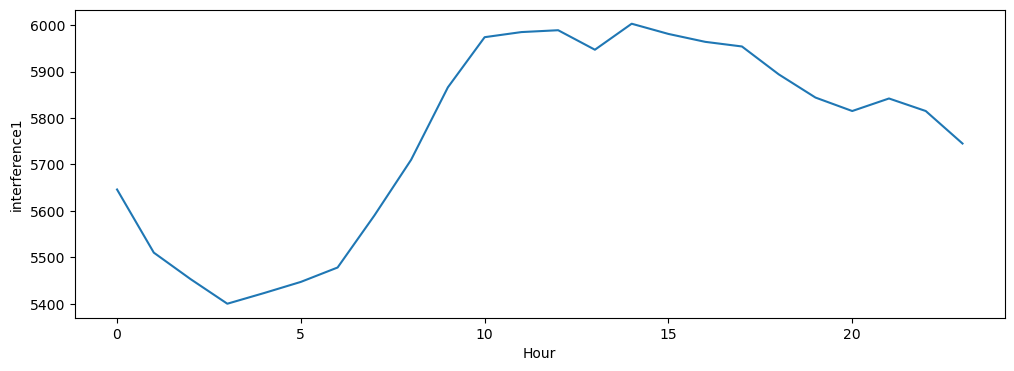

In [36]:
# Hourly_trend, data is of 5 days that's why counts showing like this, Only MCS considered
plt.figure(figsize = (12,4))
sns.lineplot(x = Hourly_trend['Hour'], y = Hourly_trend['interference1'], data = Hourly_trend)

In [37]:
fre_dist = df.groupby('Operating_Frequency_MHz')['interference1'].sum().reset_index()
fre_dist.sort_values(by = 'interference1')

,Operating_Frequency_MHz,interference1
136,5950.0,0
134,5920.0,0
2,5015.0,0
131,5880.0,0
5,5150.0,0
47,5415.0,0
20,5225.0,0
12,5185.0,0
48,5465.0,1
72,5585.0,3


In [38]:
fre_dist['Band'] = 'Out of Band'
fre_dist.loc[((fre_dist['Operating_Frequency_MHz'] >= 5150) & (fre_dist['Operating_Frequency_MHz'] <= 5350)) | 
              ((fre_dist['Operating_Frequency_MHz'] >= 5470) & (fre_dist['Operating_Frequency_MHz'] <= 5875)),
              'Band'] = 'In Band'

In [39]:
fre_dist

,Operating_Frequency_MHz,interference1,Band
0,0.0,4,Out of Band
1,5010.0,18,Out of Band
2,5015.0,0,Out of Band
3,5050.0,71,Out of Band
4,5125.0,30,Out of Band
5,5150.0,0,In Band
6,5155.0,118,In Band
7,5160.0,489,In Band
8,5165.0,409,In Band
9,5170.0,475,In Band


In [54]:
fre_dist = fre_dist[fre_dist['Band'] == 'In Band']
fre_dist.head(2)

,Operating_Frequency_MHz,interference1,Band
5,5150.0,0,In Band
6,5155.0,118,In Band


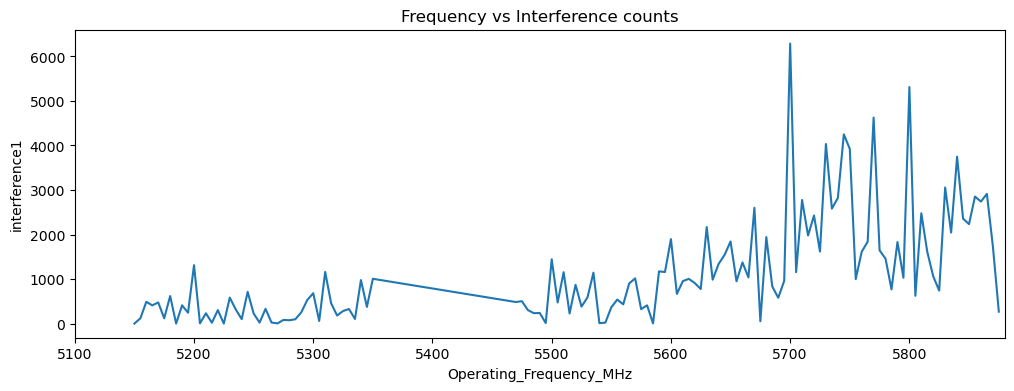

In [56]:
#Only MCS considered
plt.figure(figsize = (12,4))
sns.lineplot(x = fre_dist['Operating_Frequency_MHz'], y = fre_dist['interference1'], data = fre_dist)
plt.xlim(5100, 5880)
plt.title("Frequency vs Interference counts")
plt.show()

In [58]:
unique_devices_per_day = df[df['interference1'] == 1].groupby('Date')['Device_IP'].nunique().reset_index()
unique_devices_per_day

,Date,Device_IP
0,2024-01-22,1622
1,2024-01-23,1646
2,2024-01-24,1647
3,2024-01-28,1535
4,2024-01-29,1631


In [49]:
#On how many hours any device has interefrence
date_wise_counts = df.groupby(['Device_IP', 'Date'])['interference1'].sum().reset_index()
date_wise_counts

,Device_IP,Date,interference1
0,10.10.11.234,2024-01-22,24
1,10.10.11.234,2024-01-23,24
2,10.10.11.234,2024-01-24,24
3,10.10.11.234,2024-01-28,24
4,10.10.11.234,2024-01-29,23
5,10.10.118.118,2024-01-22,0
6,10.10.118.118,2024-01-23,0
7,10.10.118.118,2024-01-24,0
8,10.10.118.118,2024-01-28,0
9,10.10.118.118,2024-01-29,0


In [50]:
date_wise_counts.describe()

,interference1
count,10350.000000
mean,13.359903
std,9.889086
min,0.000000
25%,1.000000
50%,17.000000
75%,23.000000
max,24.000000


In [51]:
date_wise_counts['Int_Yes_or_No'] = date_wise_counts['interference1'].apply(lambda x:1 if x >0 else 0)


In [52]:
#On how many days any device has interference
days_counts = date_wise_counts.groupby('Device_IP')['Int_Yes_or_No'].sum().reset_index()
days_counts

,Device_IP,Int_Yes_or_No
0,10.10.11.234,5
1,10.10.118.118,0
2,10.10.118.150,5
3,10.10.140.116,0
4,10.10.140.118,5
5,10.10.144.116,5
6,10.10.144.119,5
7,10.10.151.101,5
8,10.10.151.102,5
9,10.10.151.19,5


In [53]:
days_counts.describe()

,Int_Yes_or_No
count,2151.000000
mean,3.756857
std,1.926780
min,0.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000
